In [60]:
import scipy.sparse as sps
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   
import warnings 
warnings.filterwarnings("ignore")

In [22]:
tracks = np.genfromtxt('../input/tracks.csv' , delimiter=',',dtype=int)[1:]

In [80]:
unique_artists =list(set(tracks[:,2]))
unique_albums = list(set(tracks[:,1]))
unique_durations = list(set(tracks[:,3]))
unique_songs = list(set(tracks[:,0]))

artists = tracks[:,2]
albums = tracks[:,1]
durations = tracks[:,3]
songs = tracks[:,0]

In [79]:
num_artists = len(unique_artists)
num_albums = len(unique_albums)
num_durations = len(unique_durations)
num_songs = len(unique_songs)

In [49]:
print('There are: \n {} different artists,\n {} different albums, \n {}  different durations'
      .format(num_artists, num_albums, num_durations))
    

There are: 
 6668 different artists,
 12744 different albums, 
 594  different durations


In [50]:
dataframe_tracs = pd.read_csv('../input/tracks.csv')

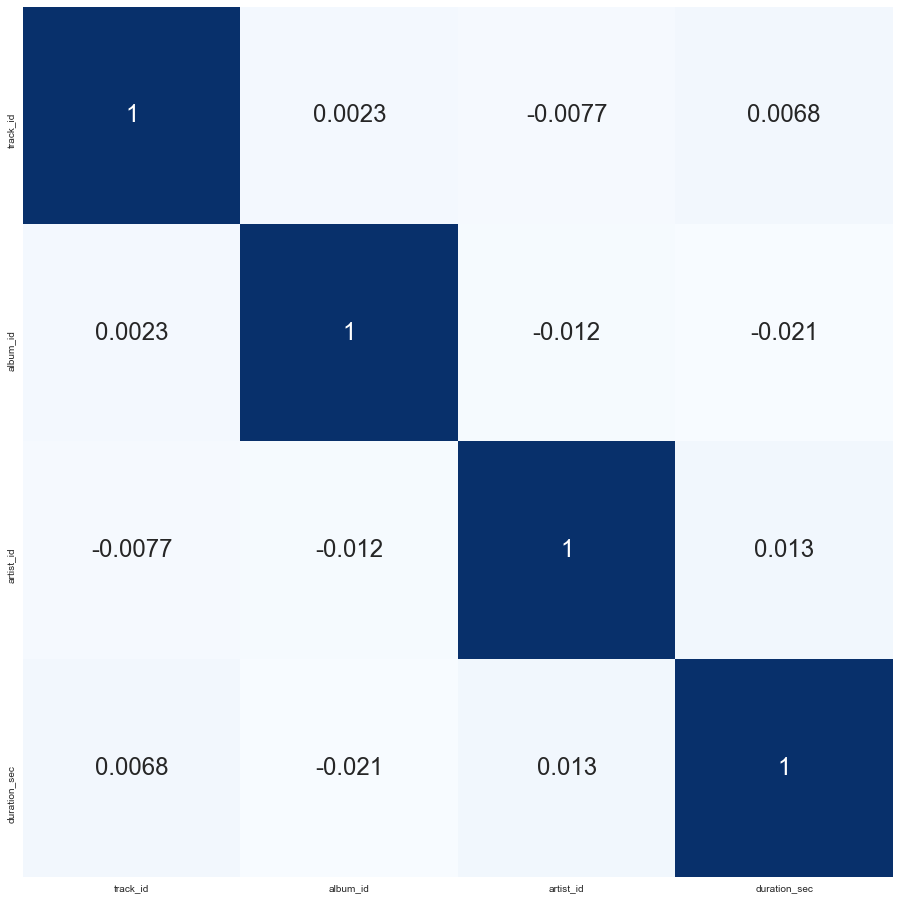

In [61]:
cov=dataframe_tracs.corr(method='pearson')
plt.figure(figsize = (16,16))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

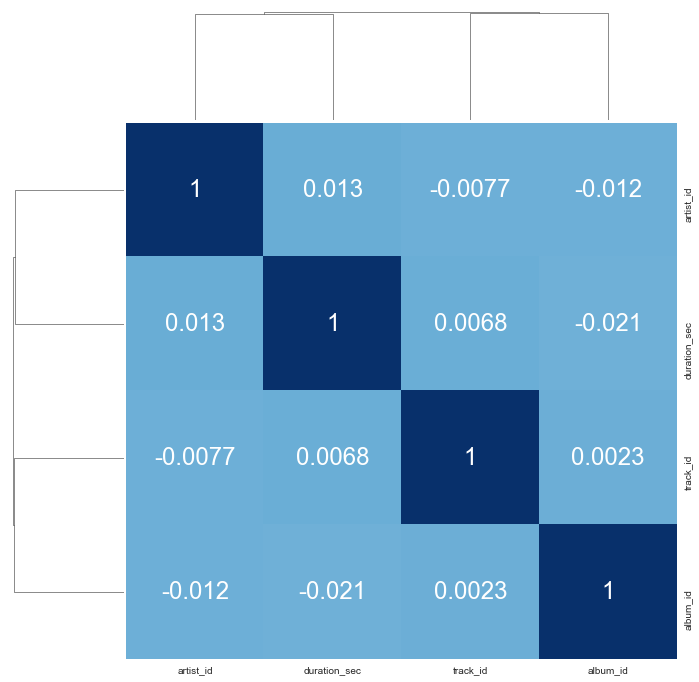

In [62]:
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(12, 12))
cm.cax.set_visible(False)

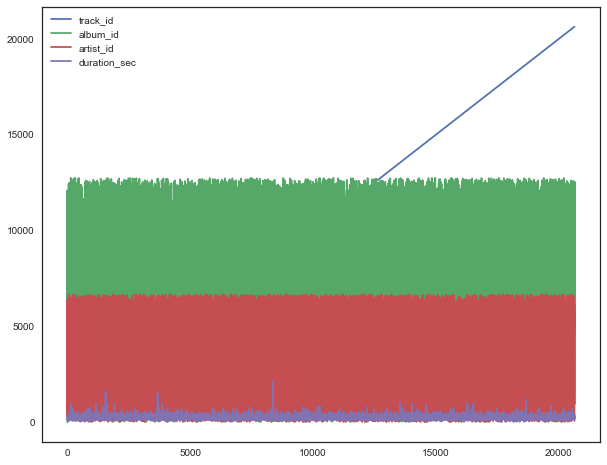

In [63]:
plt.figure(figsize=(10,8))
for v in dataframe_tracs.columns:
    plt.plot(dataframe_tracs[v])
plt.legend(loc='best')

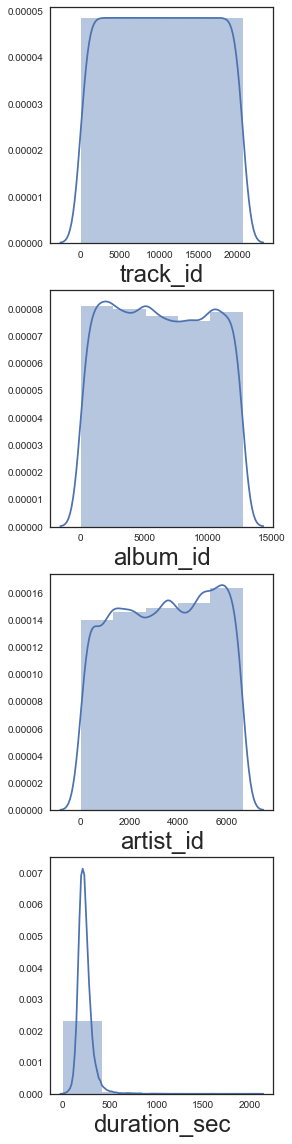

In [66]:
plt.figure(figsize=(4,len(dataframe_tracs.columns)*5))
for i,v in enumerate(dataframe_tracs.columns):
    plt.subplot(len(dataframe_tracs.columns), 1, i+1)
    hist1 = sns.distplot(dataframe_tracs[v],bins=5)

In [89]:
mat_artists = sps.lil_matrix((num_songs,np.amax(artists)+1))
mat_albums = sps.lil_matrix((num_songs,np.amax(albums)+1))
mat_duration = sps.lil_matrix((num_songs, np.amax(durations)+1))

In [90]:
mat_artists[songs,artists] = 1
mat_albums[songs,albums] = 1
mat_duration[songs, durations] = 1

In [88]:
np.amax(artists)

6667

In [91]:
csr_artists = mat_artists.tocsr()
csr_albums = mat_albums.tocsr()
csr_durations = mat_duration.tocsr()

In [92]:
csr_albums

<20635x12744 sparse matrix of type '<class 'numpy.float64'>'
	with 20635 stored elements in Compressed Sparse Row format>

In [93]:
csr_artists

<20635x6668 sparse matrix of type '<class 'numpy.float64'>'
	with 20635 stored elements in Compressed Sparse Row format>

In [94]:
csr_durations

<20635x2115 sparse matrix of type '<class 'numpy.float64'>'
	with 20635 stored elements in Compressed Sparse Row format>